In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
from matplotlib import pylab 
params = {'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.titlesize' : 22, 'axes.labelsize' : 20, 'legend.fontsize': 18, 'legend.title_fontsize': 22, 'figure.titlesize': 24 } 
pylab.rcParams.update(params)

In [3]:
df = pd.read_csv('data/virus_data.csv')

In [4]:
# Q1
print(f'number of columns: {len(df.columns)}')
print(f'number of rows: {len(df.index)}')

number of columns: 26
number of rows: 1250


In [5]:
# Q2
df['conversations_per_day'].value_counts()

1     232
2     213
3     191
4     158
5     127
0     117
6      69
7      46
8      34
9      21
10     20
12      7
11      5
13      4
15      3
14      2
16      1
Name: conversations_per_day, dtype: int64

In [6]:
df['sugar_levels'].value_counts()

88     31
84     30
95     30
92     30
81     27
       ..
137     1
138     1
149     1
136     1
131     1
Name: sugar_levels, Length: 96, dtype: int64

In [7]:
# Q3
df.head(n=10)

,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,263,16,F,64.1,A+,"('24.41288', '76.56719')",1,6,2.0,11,...,8.933243,247.230139,96.959642,11.792748,15.306437,3.929300,-214.682711,-56.344700,-1,-1
1,1768,43,M,83.9,O+,"('55.75556', '60.70278')",1,9,6.0,2,...,3.265275,57.421509,80.148318,7.616542,13.694204,5.016285,123.782023,-20.013564,-1,1
2,1374,44,M,101.5,A+,"('-26.93366', '29.24152')",0,8,1.0,3,...,2.014962,188.574377,229.499560,11.877267,-10.522185,4.745999,-65.856248,-24.400732,1,-1
3,1292,22,M,74.6,O+,"('48.78232', '9.17702')",1,6,3.0,1,...,7.941965,171.914488,315.920977,23.848574,-15.782997,4.323900,353.633325,-64.236355,1,1
4,818,10,F,37.9,O+,"('39.78504', '-85.76942')",1,6,1.0,1,...,9.567185,76.922690,215.179195,13.824784,-15.339006,11.384751,-41.861680,-62.901711,-1,1
5,1251,7,M,40.7,O+,"('-4.5833', '15.16554')",2,5,4.0,1,...,7.534619,134.934961,263.613295,12.229589,6.370092,3.954962,-69.859128,-53.896065,-1,-1
6,1505,36,M,83.1,B+,"('41.77583', '140.73667')",0,5,1.0,5,...,9.041311,303.197664,294.266521,16.150308,10.050195,2.325080,97.536918,-58.876889,1,1
7,121,44,F,68.7,A+,"('48.98693', '2.44892')",0,9,4.0,3,...,2.057122,271.961417,159.802162,11.719822,-12.186447,2.485489,-379.264145,-23.552485,-1,-1
8,603,12,M,45.8,A+,"('33.4425', '129.96972')",1,9,1.0,3,...,4.370632,245.326569,93.506362,17.833951,-11.031948,7.390832,-390.677604,-40.421163,-1,-1
9,1105,48,F,74.4,A-,"('32.65246', '51.67462')",0,8,1.0,1,...,2.004265,170.690329,334.129213,12.090475,-19.129867,5.212256,208.792413,-21.238537,1,-1


In [8]:
df[['sugar_levels', 'sport_activity', 'symptoms',
       'pcr_date', 'PCR_01', 'PCR_02']].head(n=10)

,sugar_levels,sport_activity,symptoms,pcr_date,PCR_01,PCR_02
0,108,1,NaN,2020-07-05,-4.598459,-11.204668
1,116,0,NaN,2020-02-12,2.090646,-11.118427
2,112,2,cough;shortness_of_breath,2020-07-26,3.742559,4.206684
3,109,0,NaN,2020-11-07,-1.418033,-1.529560
4,89,2,sore_throat,2021-04-26,-3.234428,0.447605
5,91,1,fever,2021-02-28,2.155015,4.920626
6,129,1,NaN,2020-06-19,-0.614365,8.694640
7,121,0,sore_throat;fever,2021-05-18,-4.426585,6.073550
8,75,1,cough;shortness_of_breath,2020-02-04,-1.873899,4.283160
9,79,2,NaN,2020-01-29,-0.761370,-1.476146


In [9]:
df.columns

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'symptoms',
       'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06',
       'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk'],
      dtype='object')

In [10]:
df.dtypes

patient_id                 int64
age                        int64
sex                       object
weight                   float64
blood_type                object
current_location          object
num_of_siblings            int64
happiness_score            int64
household_income         float64
conversations_per_day      int64
sugar_levels               int64
sport_activity             int64
symptoms                  object
pcr_date                  object
PCR_01                   float64
PCR_02                   float64
PCR_03                   float64
PCR_04                   float64
PCR_05                   float64
PCR_06                   float64
PCR_07                   float64
PCR_08                   float64
PCR_09                   float64
PCR_10                   float64
spread                     int64
risk                       int64
dtype: object

In [11]:
# Q4

train, test = train_test_split(df, test_size=0.2, random_state=(99+7))

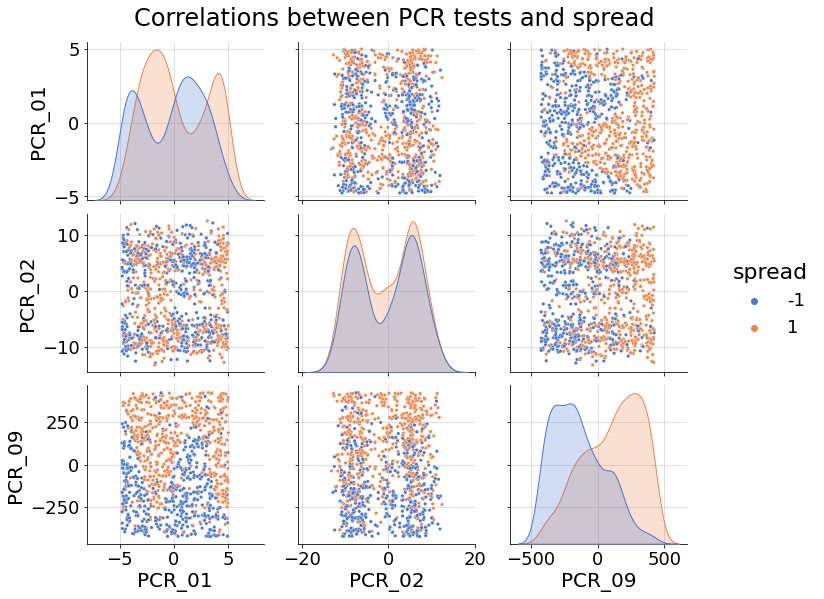

In [12]:
# Q5
corr = train.corr().spread[['PCR_01', 'PCR_02', 'PCR_09']]

g = sns.pairplot(train[['PCR_01', 'PCR_02', 'PCR_09', 'spread']], hue='spread', plot_kws={"s": 12}, palette="muted")
g.fig.suptitle("Correlations between PCR tests and spread", y=1.04)

for ax in np.ravel(g.axes): 
    ax.grid(alpha=0.5) 
    
g.fig.set_size_inches(12,8)


In [13]:
from kNN import kNN

In [14]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

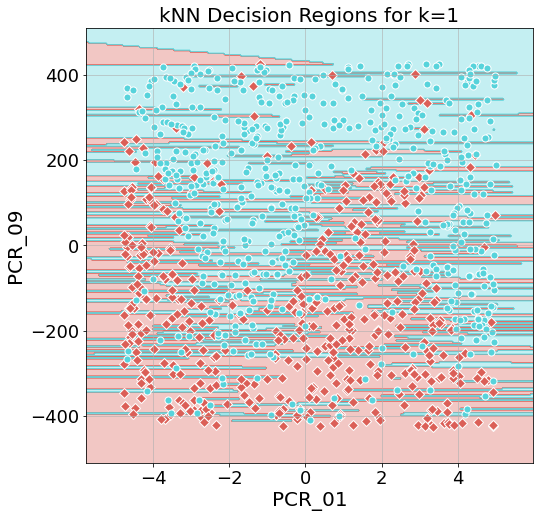

In [15]:
# Q8
features = ['PCR_01', 'PCR_09']
label = 'spread'
Xtrain = train[features]
Ytrain = train[label]
Xtest = test[features]
Ytest = test[label]

model = kNN(1)
h = model.fit(Xtrain, Ytrain)

train_score = h.score(Xtrain, Ytrain)
test_score = h.score(Xtest, Ytest)

visualize_clf(h, Xtrain, Ytrain, 'kNN Decision Regions for k=1', 'PCR_01', 'PCR_09')

In [16]:
# Q9

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))

Xtrain = train[features]
Ytrain = train[label]
Xtest = test[features]
Ytest = test[label]

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

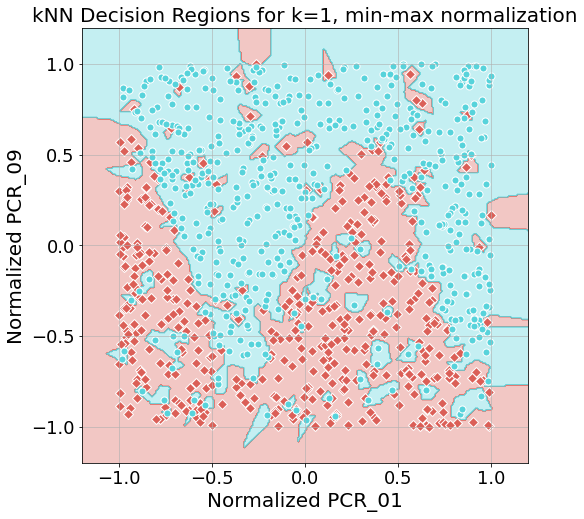

In [17]:
model = kNN(1)
h = model.fit(Xtrain, Ytrain)

train_score = h.score(Xtrain, Ytrain)
test_score = h.score(Xtest, Ytest)

visualize_clf(h, Xtrain, Ytrain, 'kNN Decision Regions for k=1, min-max normalization', 'Normalized PCR_01', 'Normalized PCR_09')

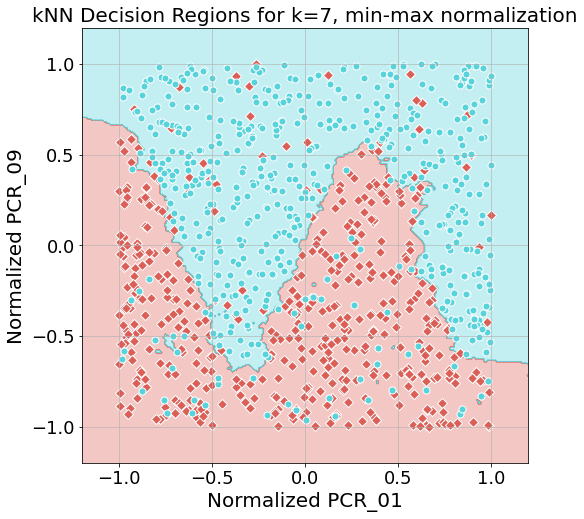

In [18]:
# Q10
model = kNN(7)
h = model.fit(Xtrain, Ytrain)

train_score = h.score(Xtrain, Ytrain)
test_score = h.score(Xtest, Ytest)

visualize_clf(h, Xtrain, Ytrain, 'kNN Decision Regions for k=7, min-max normalization', 'Normalized PCR_01', 'Normalized PCR_09')

In [19]:
# Q12

df['blood_type'].unique()

array(['A+', 'O+', 'B+', 'A-', 'AB+', 'O-', 'B-', 'AB-'], dtype=object)

Text(0.5, 1.0, 'Risk Distribution for Different Blood Types')

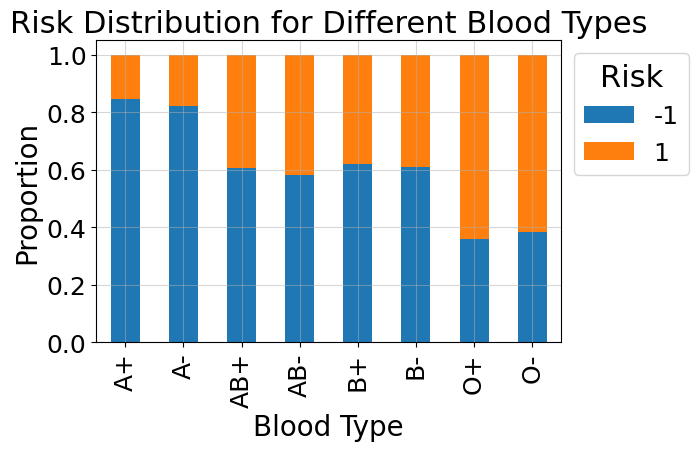

In [20]:
# Q13

ax = plt.subplot()
pd.crosstab(df['blood_type'], df['risk'], normalize="index").plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1,1), title='Risk')
ax.figure.set_dpi(100)
ax.grid(alpha=0.5)
ax.set_ylabel('Proportion')
ax.set_xlabel('Blood Type')
ax.set_title('Risk Distribution for Different Blood Types')

In [31]:
df['blood_group_1'] = df['blood_type'].isin(['A+', 'A-'])
df['blood_group_2'] = df['blood_type'].isin(['AB+', 'AB-', 'B+', 'B-'])
df['blood_group_3'] = df['blood_type'].isin(['O+', 'O-'])

In [33]:
df = df.drop(columns='blood_type')

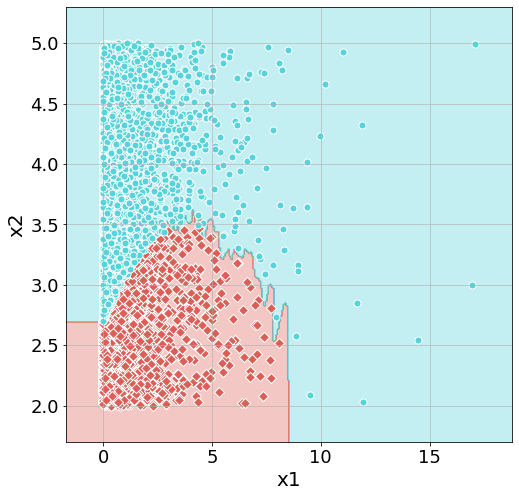

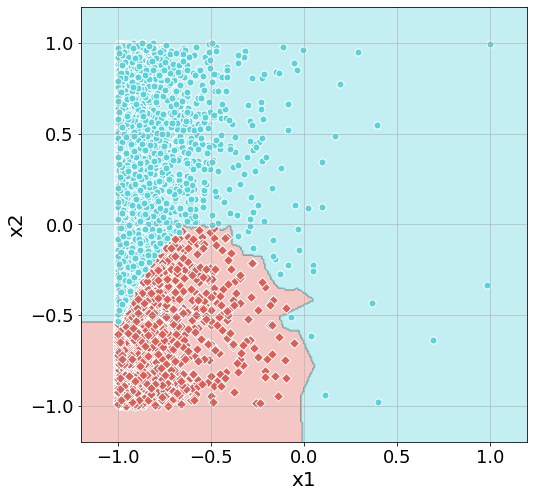

In [24]:
scaler = MinMaxScaler((-1,1))

x1 = np.random.chisquare(1, 5000)
x2 = np.random.uniform(2, 5, 5000)
t = np.ones(5000)
t[x2 < (-1/20*(x1-4)**2+3.5)] = -1

tmpdf = pd.DataFrame(data={'x1': x1, 'x2': x2, 't': t})

model = kNN(1)
model = model.fit(tmpdf[['x1','x2']], tmpdf['t'])
visualize_clf(model, tmpdf[['x1','x2']], tmpdf['t'], '', 'x1', 'x2')

X = scaler.fit_transform(tmpdf[['x1', 'x2']])

model = kNN(1)
model = model.fit(X, tmpdf['t'])
visualize_clf(model, X, tmpdf['t'], '', 'x1', 'x2')